In [15]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import sharpy.utils.h5utils as h5utils
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [16]:
path_to_files = './cases/single_speed/M16N2Ms20_skin1/'

In [17]:
with h5py.File(path_to_files + '/pazy_uinf0500_alpha1000/pazy_uinf0500_alpha1000.fem.h5') as f:
    fem = h5utils.load_h5_in_dict(f)

In [18]:
mid_elem = fem['coordinates'][fem['connectivities'][:, -1], 1]

Text(0, 0.5, 'Mass per unit length')

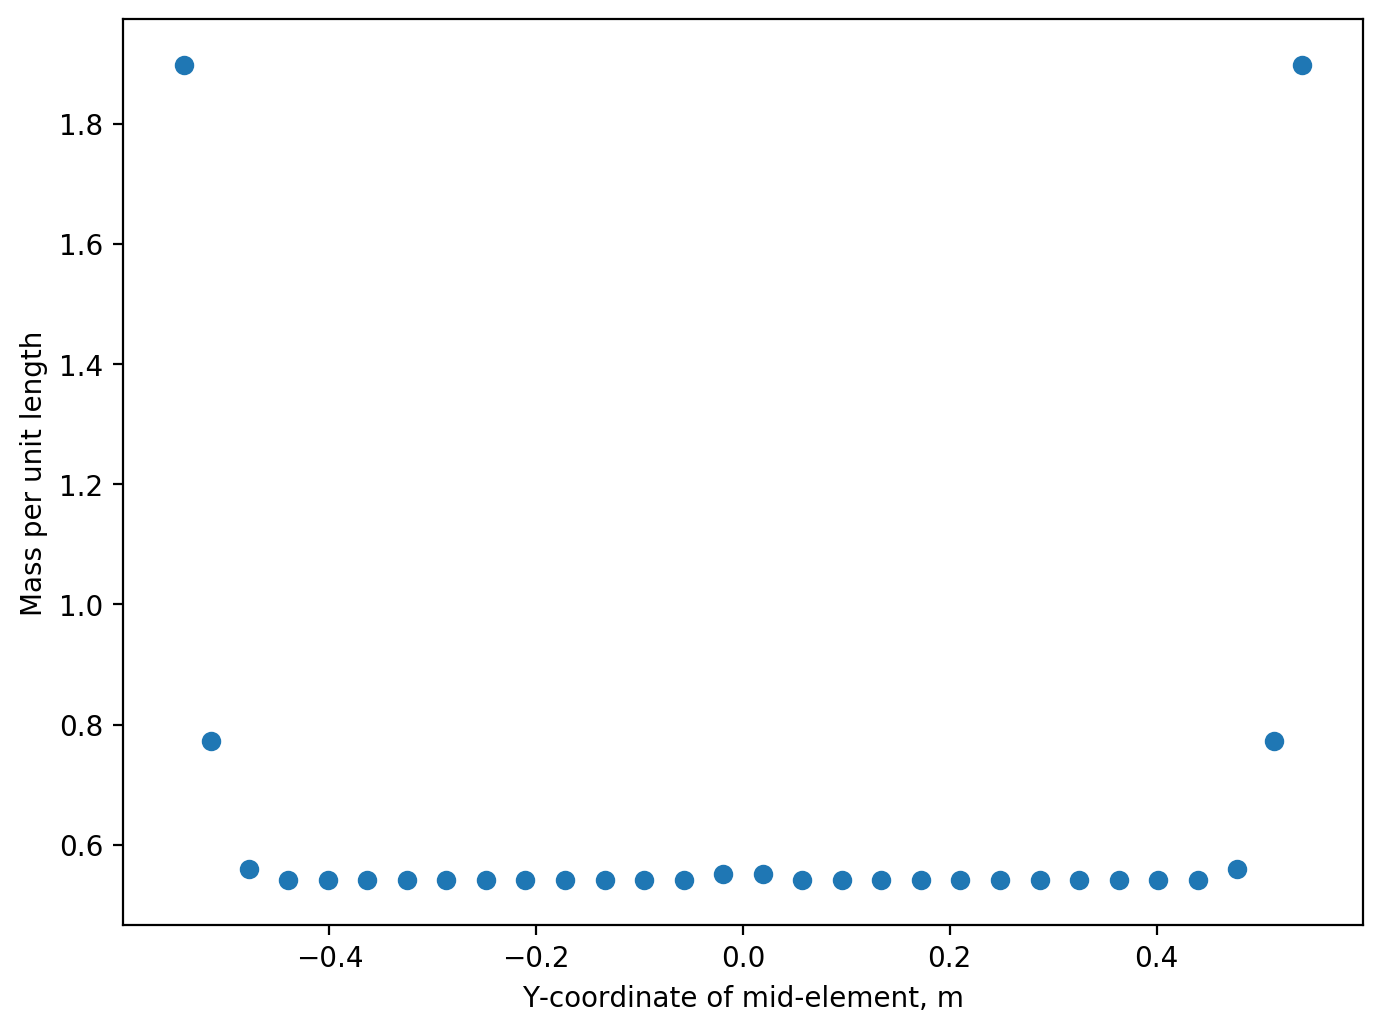

In [19]:
plt.scatter(mid_elem, fem['mass_db'][:, 0, 0])
fem['mass_db'][mid_elem>0, 0, 0] - fem['mass_db'][mid_elem<0, 0, 0][::-1]
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Mass per unit length')

Text(0, 0.5, 'Centre of gravity, x (B), m')

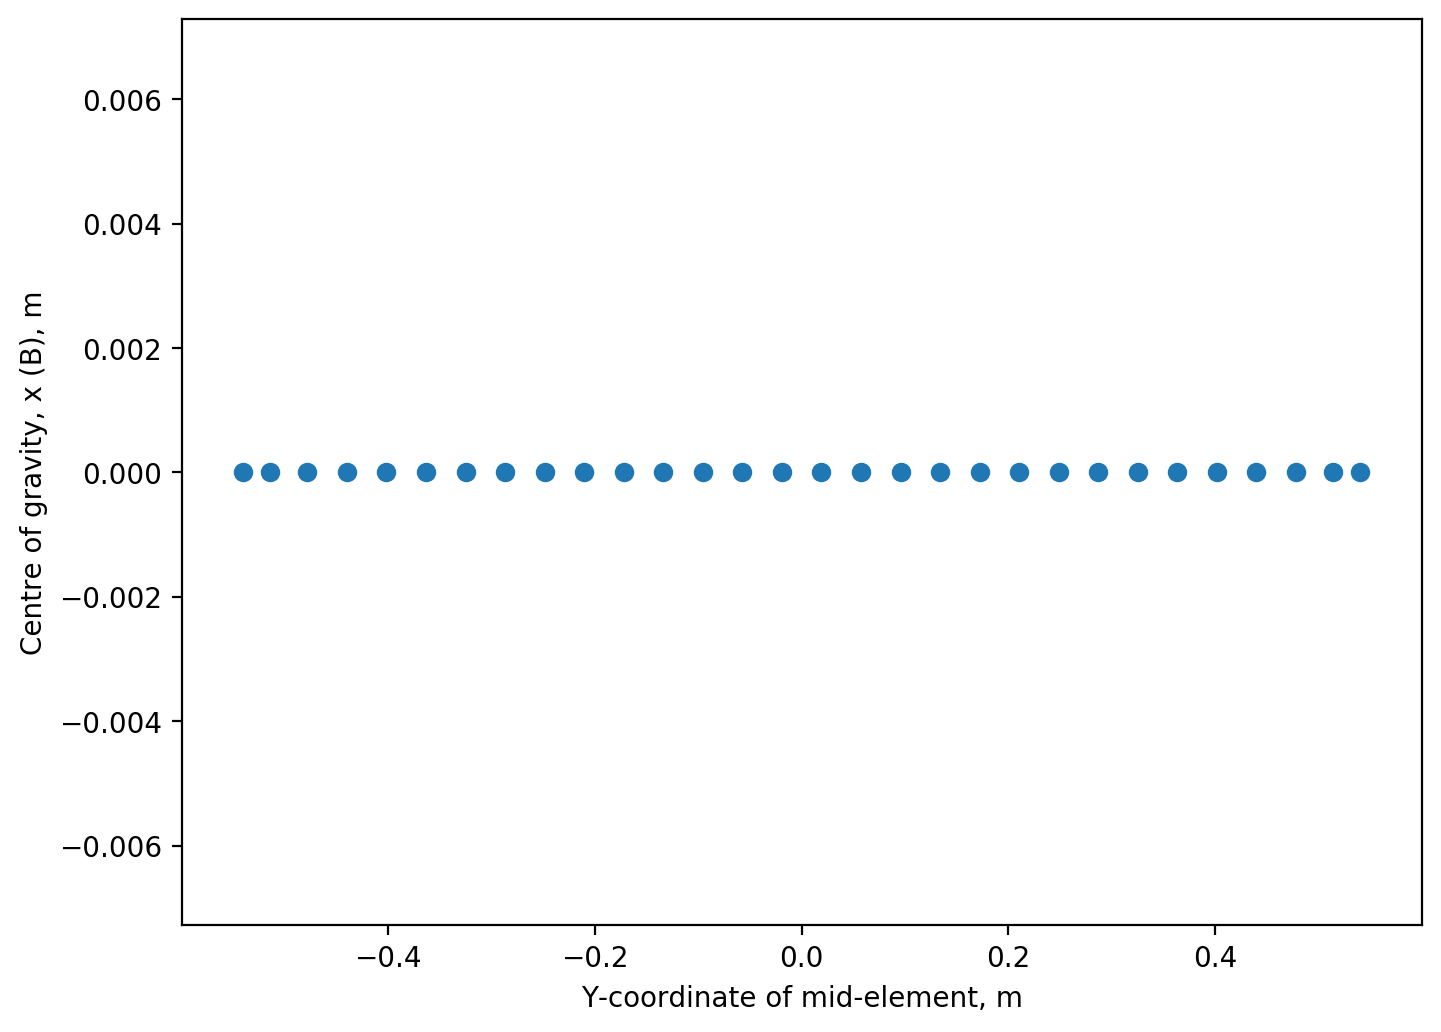

In [20]:
xcg = fem['mass_db'][:, 1, 5] / fem['mass_db'][:, 0, 0]
plt.scatter(mid_elem, xcg)
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Centre of gravity, x (B), m')

Text(0, 0.5, 'Centre of gravity, y (B), m')

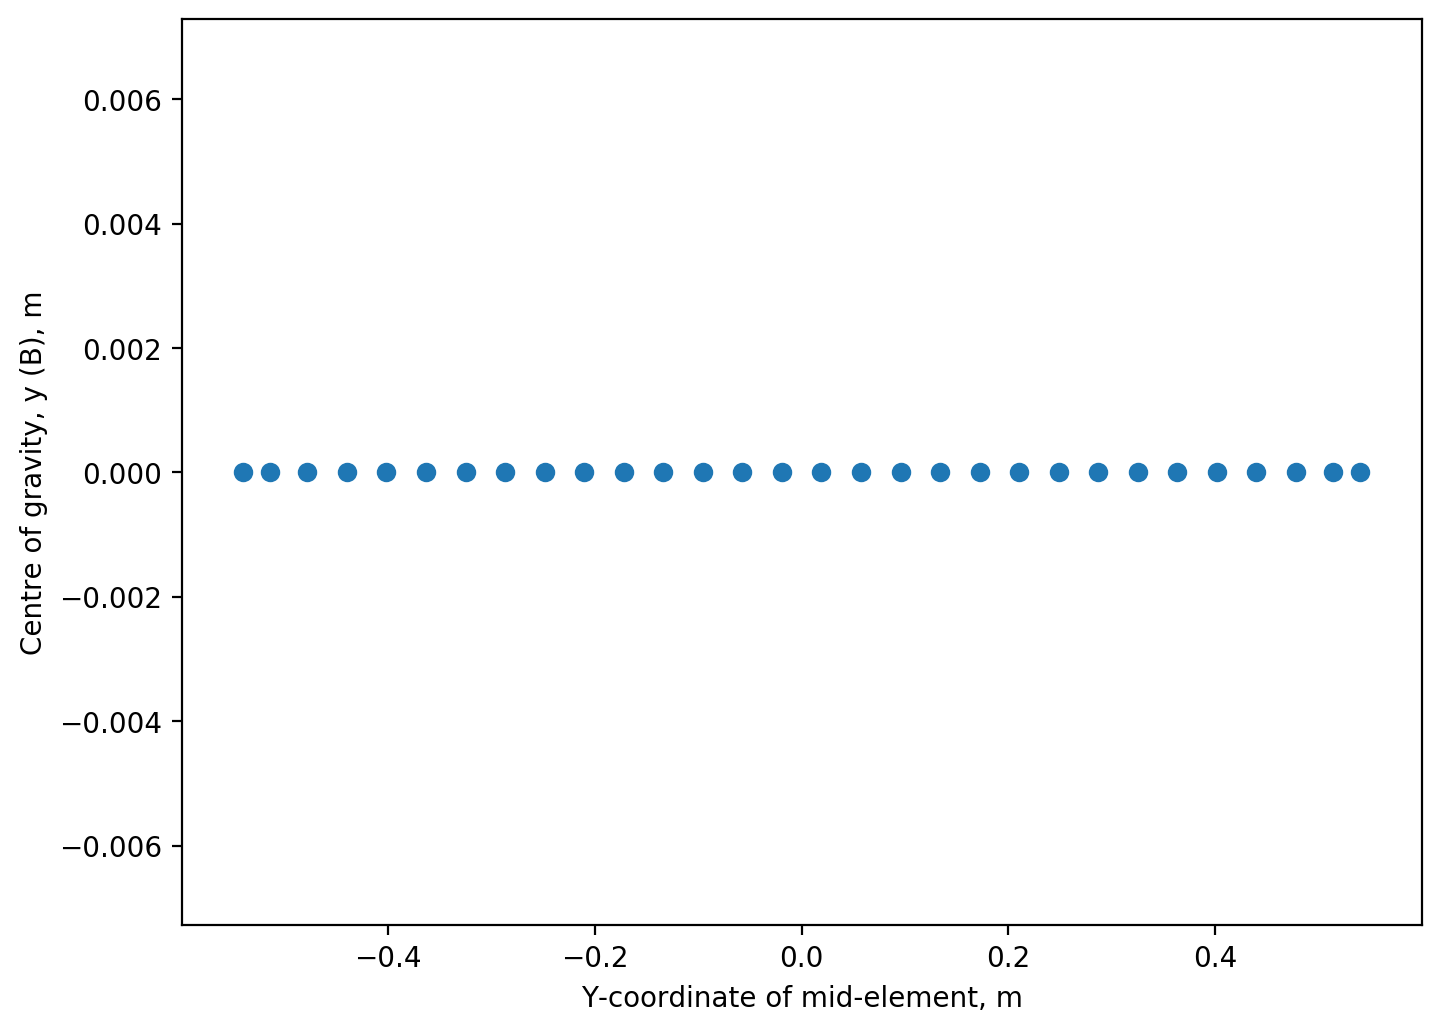

In [21]:
ycg = -fem['mass_db'][:, 0, 5] / fem['mass_db'][:, 0, 0]
plt.scatter(mid_elem, ycg)
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Centre of gravity, y (B), m')

Text(0, 0.5, 'Centre of gravity, z (B), m')

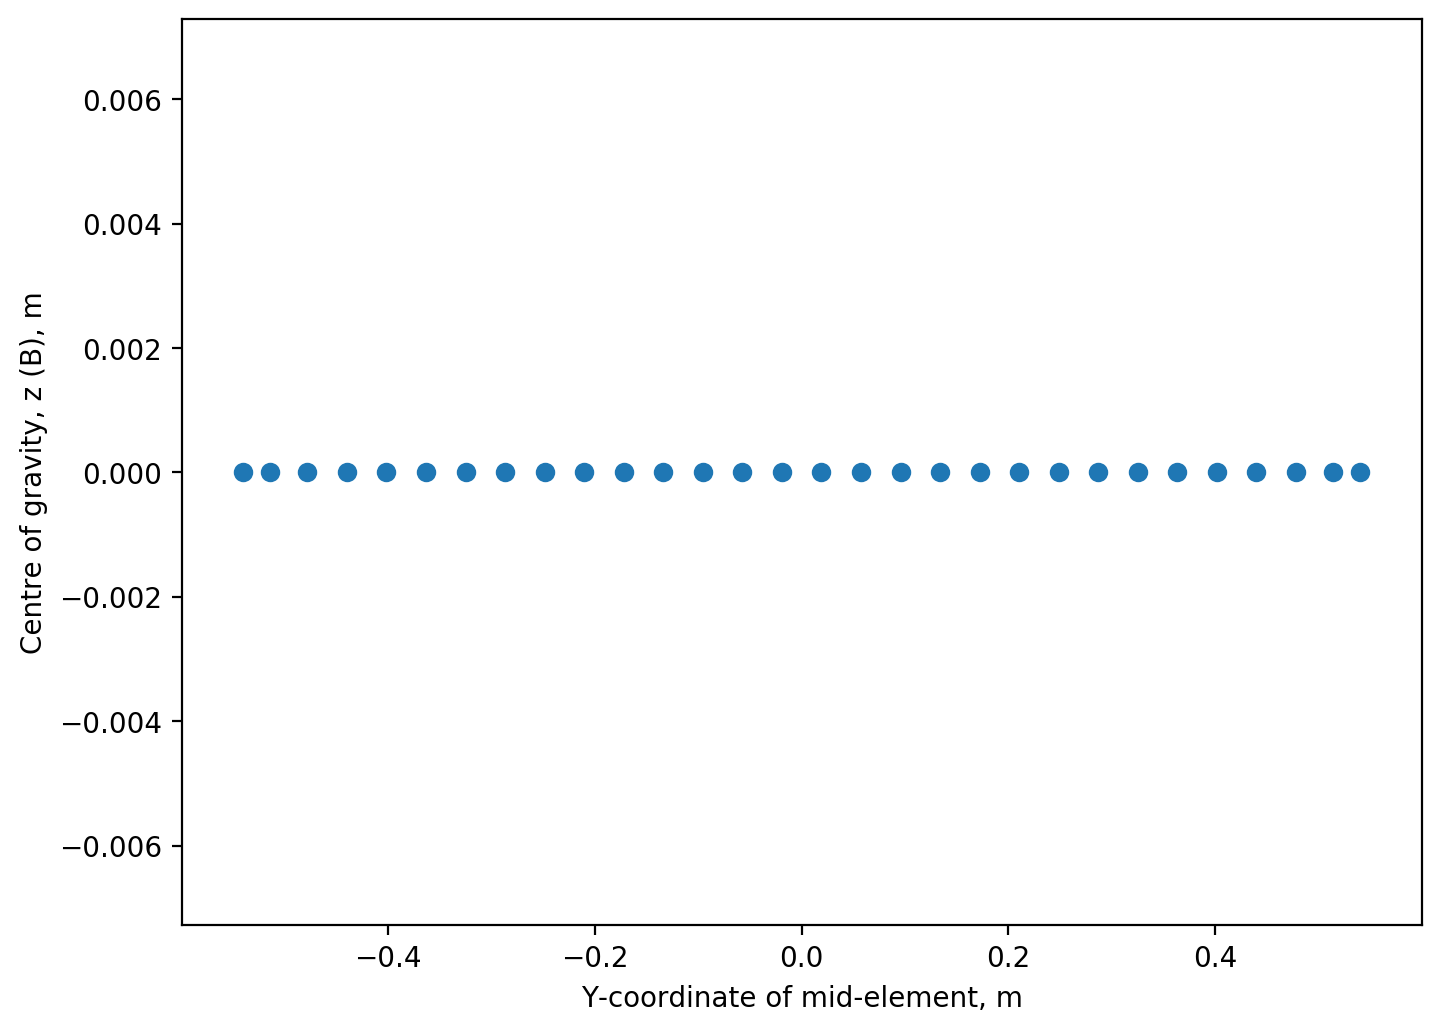

In [22]:
zcg = fem['mass_db'][:, 0, 4] / fem['mass_db'][:, 0, 0]
plt.scatter(mid_elem, zcg)
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Centre of gravity, z (B), m')

Text(0, 0.5, 'Inertia')

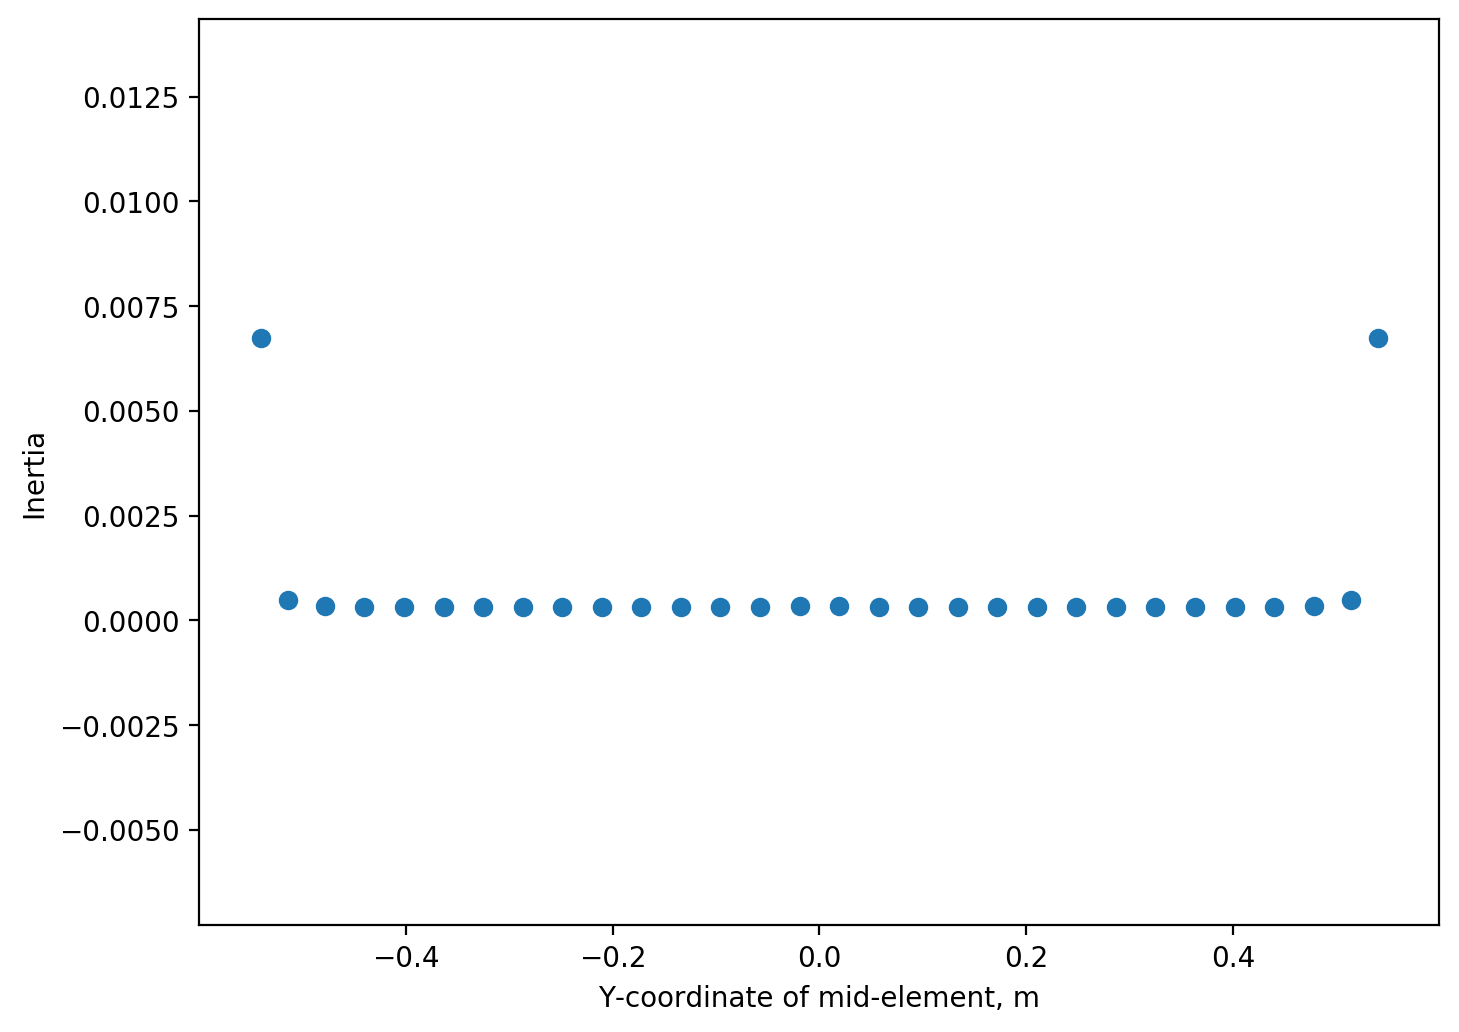

In [23]:
ixx = fem['mass_db'][:, 3, 3] 
plt.scatter(mid_elem, ixx)
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia Ixy')

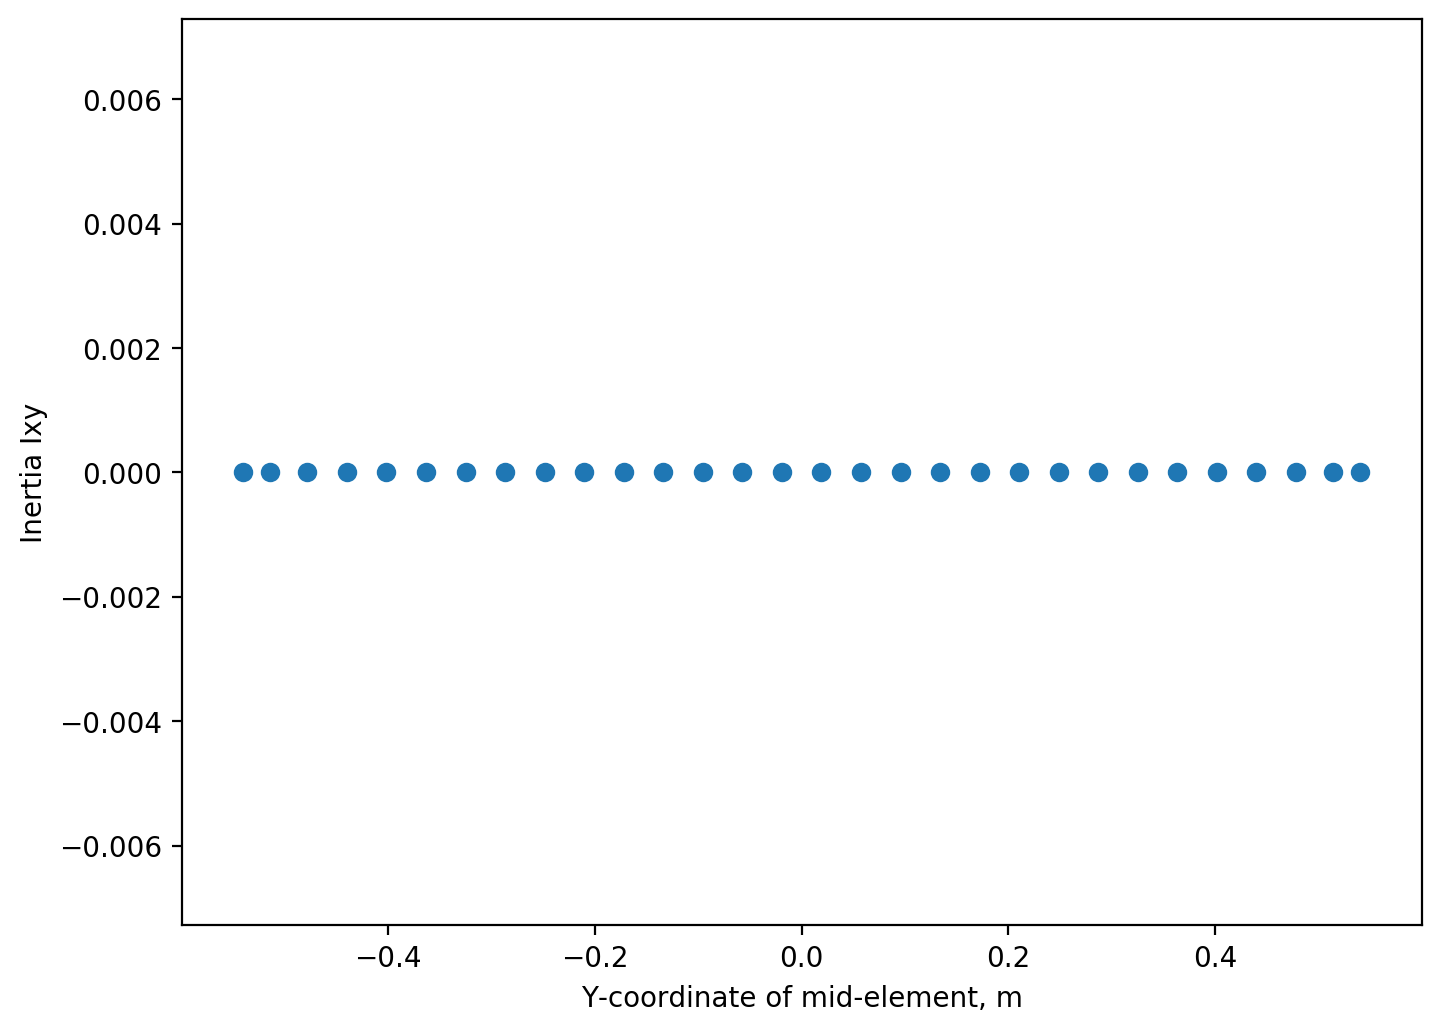

In [24]:
ixy = fem['mass_db'][:, 4, 5] 
plt.scatter(mid_elem, ixy)
plt.xlabel('Y-coordinate of mid-element, m')
plt.ylabel('Inertia Ixy')

In [25]:
path_to_results = './output_single_speed/pazy_M16N2Ms20_alpha1000_skin1/pazy_uinf0500_alpha1000/'

In [27]:
evecr = np.loadtxt(path_to_results + '/stability/eigenvectors_r.dat')
eveci = np.loadtxt(path_to_results + '/stability/eigenvectors_i.dat')

In [28]:
modes = 16

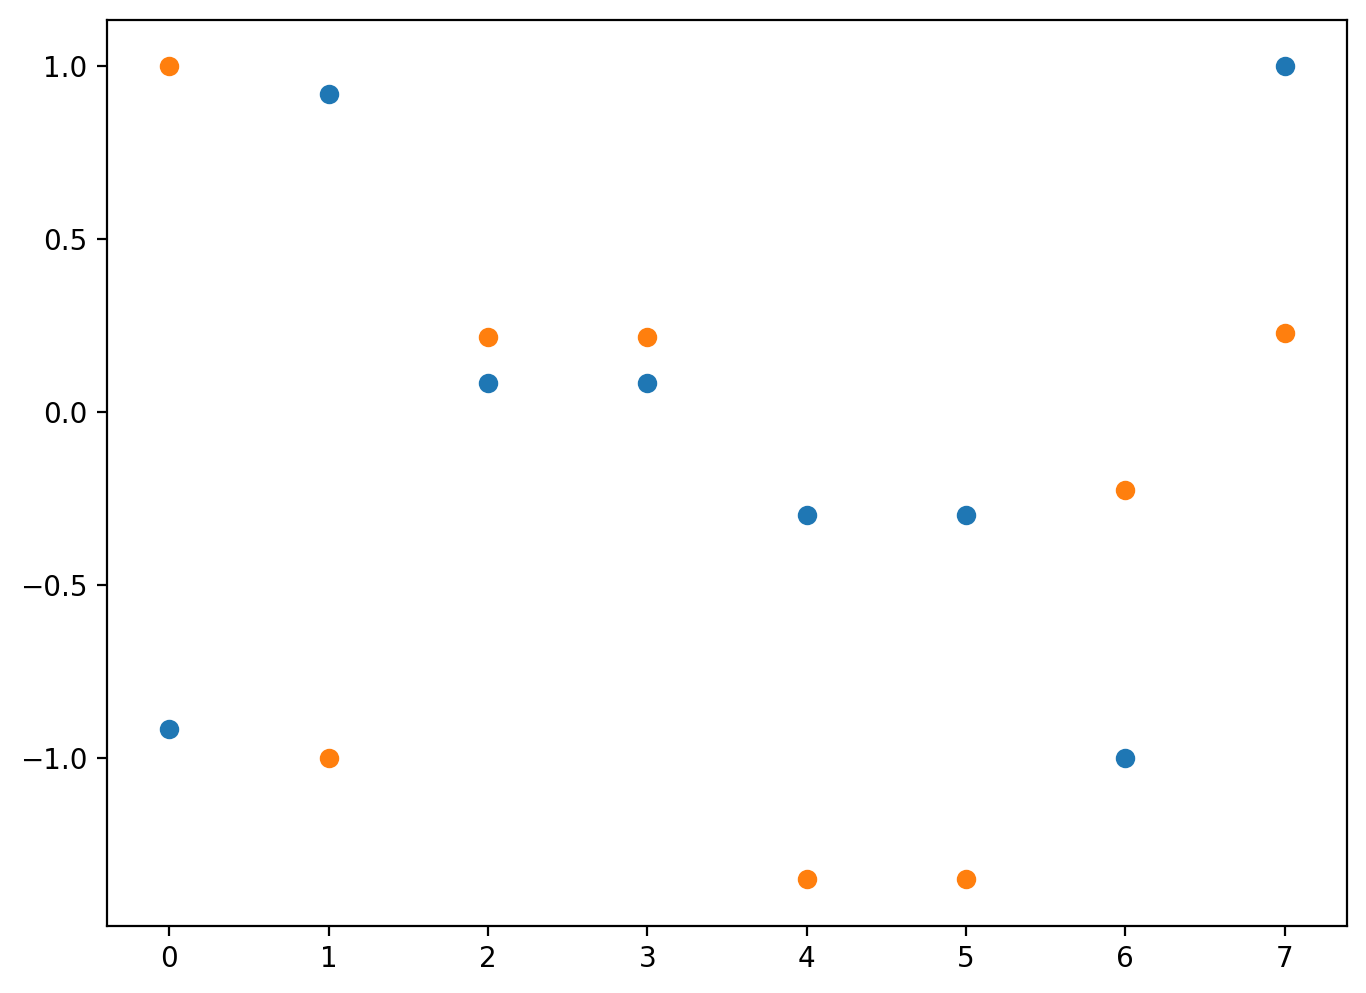

In [35]:
mode = 2
phir = evecr[-modes:-modes//2, mode] / np.max(evecr[-modes:-modes//2, mode])
phii = eveci[-modes:-modes//2, mode] / np.max(eveci[-modes:-modes//2, mode])


plt.scatter(np.arange(modes//2), phir)
plt.scatter(np.arange(modes//2), phii)